<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **Modelagem de Tópicos com BERTopic**
---



<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="40%">

**BERTopic** é um algoritmo de modelagem de tópicos baseado em `transformers` que utiliza a técnica de clusterização de `embedding` para agrupar tópicos semelhantes. Ele se baseia em pré-treinamentos em larga escala em uma grande variedade de tarefas de linguagem natural para gerar representações de texto em um espaço vetorial de alta dimensão, permitindo uma melhor captura de nuances semânticas e sintáticas. Com isso, o BERTopic se destaca por sua alta eficiência e precisão na identificação de tópicos em grandes volumes de texto.

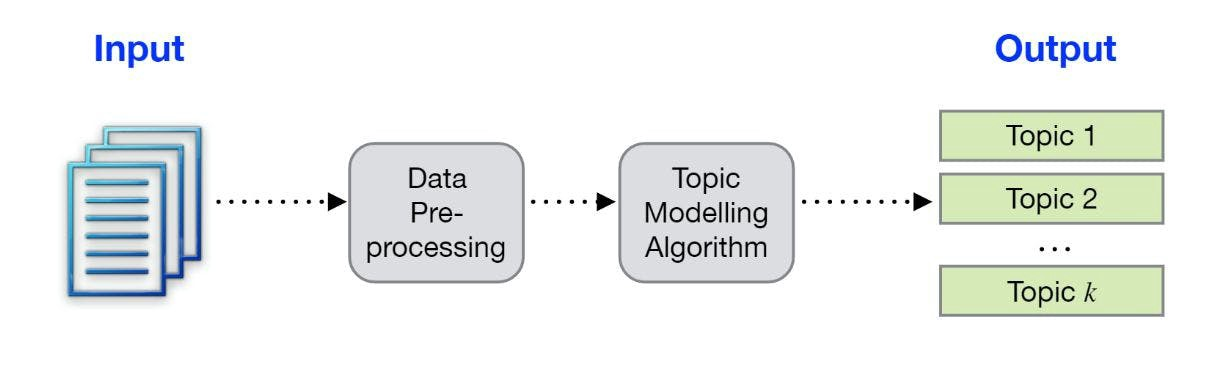

**Transformers** são modelos de linguagem baseados em redes neurais que usam a técnica de autoatencão para aprender representações de palavras e sentenças em um corpus. A arquitetura dos `transformers` permite uma análise de contexto mais ampla do que outras arquiteturas de rede neural, o que os torna particularmente adequados para tarefas de PLN, como tradução automática, sumarização de texto e resposta a perguntas. Alguns dos modelos de linguagem mais conhecidos e amplamente usados, como o GPT (*Generative Pre-trained Transformer*) e o BERT (*Bidirectional Encoder Representations from Transformers*), são baseados em `transformers`.

**Embedding** (ou "vetorização") é uma técnica usada em PLN para representar palavras ou frases como vetores numéricos densos, que podem ser manipulados matematicamente e usados como entrada para modelos de aprendizado de máquina. Cada palavra é representada por um vetor de valores numéricos em um espaço multidimensional, onde palavras semanticamente semelhantes são colocadas próximas umas das outras. O objetivo do `embedding` é capturar a relação semântica e contextual entre as palavras e frases, para que possam ser usadas em tarefas de PLN, como classificação de texto, análise de sentimento, tradução automática, entre outras. O BERT é um modelo de `embedding` pré-treinado de grande escala desenvolvido pelo Google que se tornou muito popular na comunidade de PLN.

**Olimpíada de Tóquio 2020**

Neste exemplo usaremos tweets da Olimpíada de Tóquio 2020 com o objetivo de criar um modelo que possa categorizar automaticamente os tweets por seus tópicos.

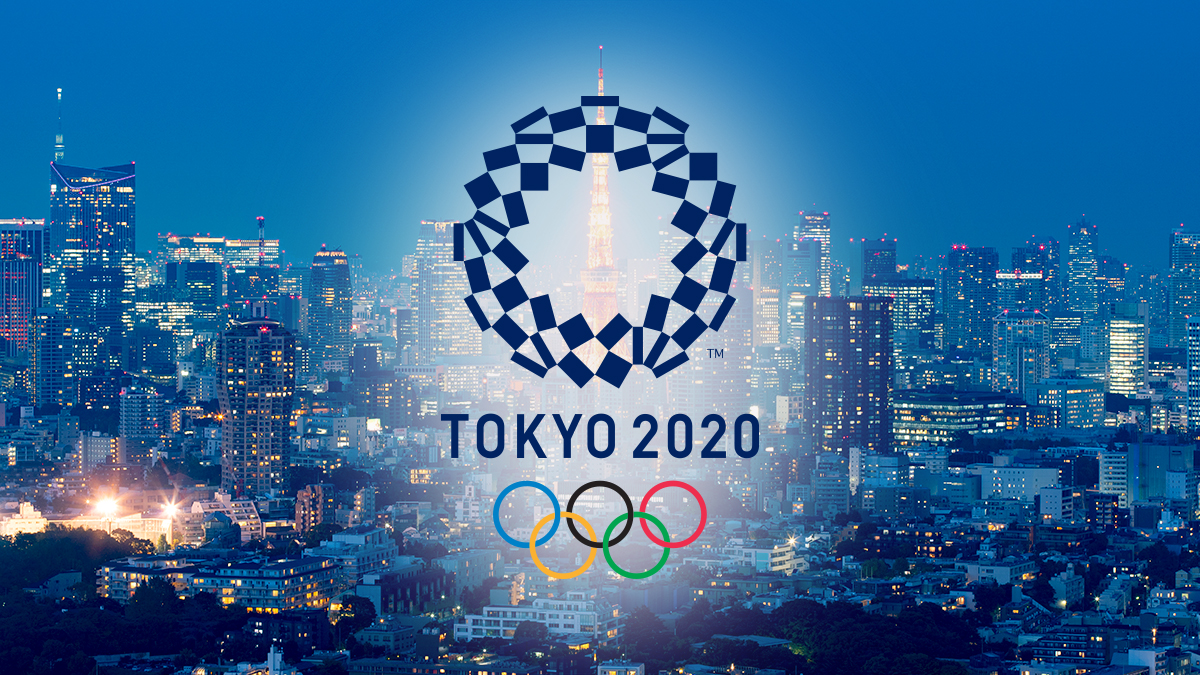

Inicialmente, é necessário instalar a biblioteca `bertopic`:

In [24]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


O conjunto de dados está disponível em:
> https://www.kaggle.com/datasets/gpreda/tokyo-olympics-2020-tweets?ref=hackernoon.com

In [25]:
import pandas as pd 
 
df = pd.read_csv("/content/tokyo_2020_tweets.csv", engine='python')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160543,1419947001102405633,Belgian Cats,Brussels,The Belgian National Team - Women's basketball,2010-05-11 10:28:27,5296,161,973,False,2021-07-27 09:05:21,It's a close contest in our first Olympic game...,NaN,Twitter Web App,7.0,38.0,False
160544,1419946996895346689,IOC MEDIA,Lausanne. Switzerland,Keep updated with all the latest news from the...,2011-01-05 10:00:39,147657,712,624,True,2021-07-27 09:05:20,10 athletes from the IOC @RefugeesOlympic star...,['Tokyo2020'],Twitter Web App,7.0,11.0,False
160545,1419946993909047299,Devin Heroux,"Toronto, Ontario",CBC News/Olympics Reporter. Based in Toronto. ...,2009-03-24 22:53:21,44209,2317,153144,True,2021-07-27 09:05:19,SNACK TIME! \n\nHow could I say no to “two sof...,NaN,Twitter for iPhone,78.0,355.0,False
160546,1419946992948576256,Ⓜ️𝐚𝐬𝐚 🍊 𝐌𝐫.𝐂𝐡𝐢𝐥𝐝𝐫𝐞𝐧 🌏,東京,🗼𝑇𝑜𝑘𝑦𝑜 𝐽𝐴𝑃𝐴𝑁 🇯🇵 ✂︎ 表参道 ⭐︎ 原宿 ✂︎ 𝐻𝑎𝑖𝑟 𝑠𝑡𝑦𝑙𝑖𝑠𝑡 ✂...,2015-12-31 02:13:03,149,245,12208,False,2021-07-27 09:05:19,.\n.\n.\n🏄‍♂️ 𝐊𝐚𝐧𝐨𝐚 𝐈𝐠𝐚𝐫𝐚𝐬𝐡𝐢 🇯🇵\n.\n.\n🥈𝐂𝐨𝐧𝐠𝐫𝐚...,['五十嵐カノア'],Twitter for iPhone,0.0,0.0,False


In [26]:
# Usaremos apenas 5000 tweets 
df = df[0:5000]

Começamos instanciando o BERTopic. Definimos o idioma para inglês, pois nossos documentos estão no idioma inglês. Se você quiser usar um modelo multilíngue, use `language="multilingual"` em vez disso.

Também calcularemos as probabilidades do tópico. No entanto, isso pode diminuir significativamente o BERTopic em grandes quantidades de dados (> 100_000 documentos). É aconselhável desativá-lo se você quiser acelerar o modelo.

**NOTA**: Utilize `language="multilingual"` para selecionar um modelo que suporte mais de 50 idiomas.

In [27]:
from bertopic import BERTopic

# Criando o modelo
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Convertendo para uma lista 
docs = df.text.to_list()

# Ajustando o modelo aos dados 
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2023-04-06 14:13:30,336 - BERTopic - Transformed documents to Embeddings
2023-04-06 14:13:43,118 - BERTopic - Reduced dimensionality
2023-04-06 14:13:45,324 - BERTopic - Clustered reduced embeddings


Depois de ajustar nosso modelo, podemos começar a analisar os resultados. Normalmente, examinamos primeiro os tópicos mais frequentes, pois eles representam melhor a coleção de documentos.

In [28]:
freq = model.get_topic_info()
freq

,Topic,Count,Name
0,-1,1545,-1_the_tokyo2020_to_and
1,0,210,0_vikas_boxing_krishan_okazawa
2,1,205,1_olympics_sports_olympicgames_tokyo2020
3,2,166,2_tokyo2020_lets_this_grande
4,3,153,3_puneethrajkumar_hearty_lifting_49kg
...,...,...,...
86,85,11,85_potential_term_roadmap_realgoldeninu
87,86,11,86_dreams_dedicat_reality_determination
88,87,11,87_jobs_ngo_vacancy_daily
89,88,10,88_swevaus_var_55_market


**NOTA**: O tópico -1 é o maior e refere-se a tweets discrepantes que não atribuem a nenhum tópico gerado. Neste caso, vamos ignorar o tópico -1.

In [31]:
# Obtendo os 5 tópicos mais frequentes
freq.head(5)

,Topic,Count,Name
0,-1,1545,-1_the_tokyo2020_to_and
1,0,210,0_vikas_boxing_krishan_okazawa
2,1,205,1_olympics_sports_olympicgames_tokyo2020
3,2,166,2_tokyo2020_lets_this_grande
4,3,153,3_puneethrajkumar_hearty_lifting_49kg


In [32]:
# Obtendo os 5 tópicos menos frequentes
freq.tail(5)

,Topic,Count,Name
86,85,11,85_potential_term_roadmap_realgoldeninu
87,86,11,86_dreams_dedicat_reality_determination
88,87,11,87_jobs_ngo_vacancy_daily
89,88,10,88_swevaus_var_55_market
90,89,10,89_adam_peaty_pool_breaststroke


In [33]:
# Obtendo o número de tópicos
topic_freq = model.get_topic_freq()

print("O modelo BERTopic tem", len(topic_freq), "tópicos.")

O modelo BERTopic tem 91 tópicos.


In [34]:
topic_freq

,Topic,Count
0,-1,1545
1,0,210
2,1,205
3,2,166
4,3,153
...,...,...
86,85,11
87,86,11
88,87,11
89,88,10


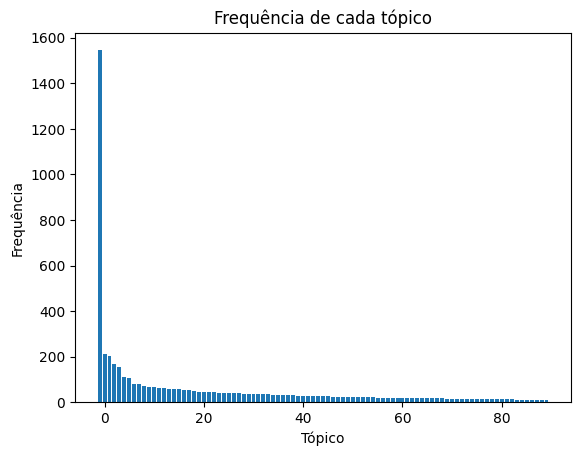

In [38]:
import matplotlib.pyplot as plt

# Obtendo a frequência de cada tópico
topic_freq = model.get_topic_freq()

# Removendo a primeira frequência de tópico
#topic_freq = topic_freq.drop(0).reset_index(drop=True)

# Plotando um gráfico de barras com a frequência de cada tópico
plt.bar(x=topic_freq['Topic'], height=topic_freq['Count'])
plt.title('Frequência de cada tópico')
plt.xlabel('Tópico')
plt.ylabel('Frequência')
plt.show()

**NOTA**: BERTopic é estocástico, o que significa que os tópicos podem diferir entre as execuções. "Estocástico" é um termo que se refere a um processo ou modelo que envolve algum elemento de aleatoriedade ou incerteza.

Você pode selecionar um tópico específico e obter as n principais palavras para esse tópico e suas pontuações c-TF-IDF.

In [41]:
# selecione o tópico mais frequente
model.get_topic(0)

[('vikas', 0.075265147025943),
 ('boxing', 0.07399219708702336),
 ('krishan', 0.0525512770279395),
 ('okazawa', 0.03651788862734727),
 ('round', 0.036316532912378706),
 ('loses', 0.030663720767457898),
 ('boxer', 0.02888191904360666),
 ('krishnan', 0.026071740861847503),
 ('welterweight', 0.02153198907543091),
 ('japanese', 0.021263197248292637)]

Há várias opções de **visualização** disponíveis no BERTopic, nomeadamente a visualização de tópicos, probabilidades e tópicos ao longo do tempo. A modelagem de tópicos é, até certo ponto, bastante subjetiva. As visualizações ajudam a entender os tópicos que foram criados.

Depois de treinar nosso modelo BERTopic, podemos percorrer iterativamente talvez uma centena de tópicos para obter uma boa compreensão dos tópicos que foram extraídos. No entanto, isso leva algum tempo e carece de uma representação global. Em vez disso, podemos visualizar os tópicos que foram gerados de forma muito semelhante ao LDAvis:

In [45]:
model.visualize_topics()

Será gerada uma figura interativa que pode ser usada conforme indicado na animação acima. Cada círculo indica um tópico e seu tamanho é a frequência do tópico em todos os documentos.

In [46]:
model.visualize_topics(top_n_topics=5)

As probabilidades variáveis que são retornadas de `transform()` ou `fit_transform()` podem ser usadas para entender o quão confiante é o BERTopic de que certos tópicos podem ser encontrados em um documento.

Para cada documento, também podemos visualizar a probabilidade desse documento pertencer a cada tópico possível. Para fazer isso, usamos a variável probabilidades após executar o BERTopic para entender o quão confiável o modelo é para aquela instância.

Como há muitos tópicos para visualizar, visualizamos a distribuição de probabilidade dos tópicos mais prováveis:

In [47]:
model.visualize_distribution(probabilities[1], min_probability=0.015)

Parece que para este documento, o modelo teve um pouco mais de dificuldade em escolher o tópico correto, pois eram vários tópicos muito semelhantes entre si.

Os tópicos que foram criados podem ser reduzidos hierarquicamente. Para entender a estrutura hierárquica potencial dos tópicos, podemos usar `scipy.cluster.hierarchy` para criar clusters e visualizar como eles se relacionam. Isso pode ajudar a selecionar um número de tópicos apropriado ao reduzir o número de tópicos que você criou.

In [49]:
model.visualize_hierarchy(top_n_topics=50)

Podemos visualizar os termos selecionados para alguns tópicos criando gráficos de barras a partir das pontuações de c-TF-IDF para cada representação de tópico. Insights podem ser obtidos a partir das pontuações relativas de c-TF-IDF entre e dentro dos tópicos. Além disso, você pode facilmente comparar as representações de tópicos entre si.

In [52]:
model.visualize_barchart(top_n_topics=4)

Você também pode visualizar como certos tópicos são semelhantes entre si. Podemos criar uma matriz de similaridade simplesmente aplicando semelhanças de cosseno por meio desses embeddings de tópicos. O resultado será uma matriz indicando o quão semelhantes certos tópicos são entre si.

In [53]:
model.visualize_heatmap(width=1000, height=1000)

Os tópicos são representados por um número de palavras começando com a melhor palavra representativa. Cada palavra é representada por uma pontuação c-TF-IDF. Quanto maior a pontuação, mais representativa é uma palavra para o tópico. Como as palavras do tópico são classificadas por sua pontuação c-TF-IDF, as pontuações diminuem lentamente com cada palavra adicionada. Em algum momento, adicionar palavras à representação do tópico aumenta apenas marginalmente a pontuação total do c-TF-IDF e não seria benéfico para sua representação.

Para visualizar esse efeito, podemos plotar as pontuações do c-TF-IDF para cada tópico pela classificação do termo de cada palavra. Em outras palavras, a posição das palavras (classificação do termo), onde as palavras com maior pontuação c-TF-IDF terão uma classificação de 1, será colocada no eixo x. Considerando que o eixo y será preenchido pelas pontuações c-TF-IDF. O resultado é uma visualização que mostra o declínio da pontuação c-TF-IDF ao adicionar palavras à representação do tópico. Ele permite que você, usando o método do cotovelo, selecione o melhor número de palavras em um tópico.

O método do Cotovelo ou método Elbow é uma técnica usada para encontrar a quantidade ideal de clusters *K*.

In [ ]:
model.visualize_term_rank()

Depois de treinar nosso modelo, podemos usar `find_topics` para pesquisar tópicos semelhantes a um termo de pesquisa de entrada. Aqui, vamos pesquisar tópicos que se relacionam intimamente com o termo de pesquisa "volleyball". Em seguida, extraímos o tópico mais semelhante e verificamos os resultados:

In [54]:
similar_topics, similarity = model.find_topics("volleyball", top_n=5); 
similar_topics

[62, 60, 1, 28, 22]

In [58]:
model.get_topic(62)

[('handball', 0.1962879389019968),
 ('egypt', 0.0767939069469039),
 ('esp', 0.07175230477141682),
 ('portugal', 0.07175230477141682),
 ('card', 0.04875304621319701),
 ('teams', 0.04688958089593823),
 ('ger', 0.043274540861670624),
 ('insane', 0.04223358316870178),
 ('fra', 0.04223358316870178),
 ('nor', 0.04007173249764982)]

Também podemos reduzir o número de tópicos depois de treinar um modelo BERTopic. A vantagem de fazer isso é que você pode decidir o número de tópicos depois de saber quantos são realmente criados. É difícil prever antes de treinar seu modelo quantos tópicos estão em seus documentos e quantos serão extraídos. Em vez disso, podemos decidir depois quantos tópicos parecem realistas.

In [59]:
model.reduce_topics(docs, nr_topics=5)

2023-04-06 14:30:02,936 - BERTopic - Reduced number of topics from 91 to 5


In [60]:
topics = model.topics_
probabilities = model.probabilities_

**Mais informações em:**

> https://github.com/MaartenGr/BERTopic